In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:
from tensorflow.keras.models import Sequential

In [4]:
data_training="train"
data_testing="test"
data_validation="validation"

In [5]:
img_width=180
img_height=180

In [6]:
data_train=tf.keras.utils.image_dataset_from_directory(
data_training,
shuffle=True,
image_size=(img_width,img_height),
batch_size=32,
validation_split=False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat=data_train.class_names

In [12]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [13]:
data_val=tf.keras.utils.image_dataset_from_directory(
data_validation,
shuffle=True,
image_size=(img_width,img_height),
batch_size=32,
validation_split=False)

Found 351 files belonging to 36 classes.


In [14]:
data_test=tf.keras.utils.image_dataset_from_directory(
data_testing,
shuffle=True,
image_size=(img_width,img_height),
batch_size=32,
validation_split=False)

Found 359 files belonging to 36 classes.


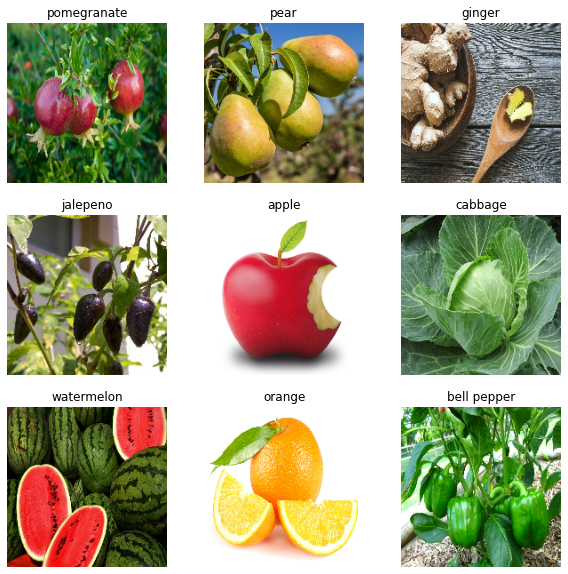

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
    for i in range(min(9, images.shape[0])):
        plt.subplot(3, 3, i + 1)
        # Normalize the image pixels to [0, 1] range
        plt.imshow(images[i].numpy() / 255.0)
        plt.title(data_cat[labels[i].numpy()])
        plt.axis("off")
plt.show()


In [19]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),  # Added activation function
    layers.Dense(len(data_cat), activation='softmax')  # Changed to softmax activation and corrected units
])


In [24]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# Remove from_logits=True
model.compile(optimizer='adam', 
              loss=SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])


In [12]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [26]:


from tensorflow.keras.callbacks import EarlyStopping

epochs_size=20
early_stopping = EarlyStopping(monitor='val_loss', patience=4)
history=model.fit(data_train,
                  validation_data=data_val,
                  epochs=epochs_size,
                  callbacks=[early_stopping]
                 )

Epoch 1/20
98/98 [==============================] - 115s 1s/step - loss: 0.0652 - accuracy: 0.9881 - val_loss: 0.3771 - val_accuracy: 0.9573
Epoch 2/20
98/98 [==============================] - 104s 1s/step - loss: 0.0772 - accuracy: 0.9839 - val_loss: 0.3284 - val_accuracy: 0.9487
Epoch 3/20
98/98 [==============================] - 103s 988ms/step - loss: 0.0526 - accuracy: 0.9878 - val_loss: 0.3915 - val_accuracy: 0.9573
Epoch 4/20
98/98 [==============================] - 84s 809ms/step - loss: 0.0599 - accuracy: 0.9856 - val_loss: 0.3401 - val_accuracy: 0.9544
Epoch 5/20
98/98 [==============================] - 88s 833ms/step - loss: 0.0453 - accuracy: 0.9891 - val_loss: 0.3721 - val_accuracy: 0.9544
Epoch 6/20
98/98 [==============================] - 92s 896ms/step - loss: 0.0455 - accuracy: 0.9888 - val_loss: 0.3541 - val_accuracy: 0.9573


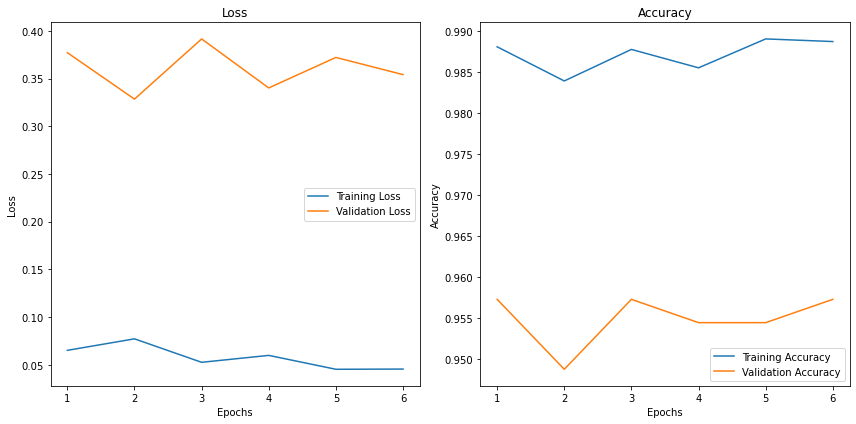

In [28]:
# Extracting loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
image = 'image_3.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [42]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 109ms/step


In [43]:
score = tf.nn.softmax(predict)

In [44]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is eggplant with accuracy of 7.21


In [40]:
# Save the model in the native Keras format
model.save("image_classifier.keras")

# Reload the model
loaded_model = tf.keras.models.load_model("image_classifier.keras")

# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(data_test)
print("Test Accuracy:", test_accuracy)


12/12 [==============================] - 10s 300ms/step - loss: 0.3463 - accuracy: 0.9582
Test Accuracy: 0.9582172632217407
